# โมเดลแนวโน้มจำนวนผู้ติดเชื้อ COVID-19 ภายในอำเภอมัญจาคีรี โดยใช้โมเดล SEIR

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## สมมุติฐานเบื้องต้น
1. ประชากรในอำเภอมัญจาคีรีไม่มีการเคลื่อนย้ายประชากร รวมถึงไม่มีการเกิด และ การตาย
2. ทุกคนมีความเสี่ยงต่อการติดเชื้อเท่าๆ กัน อายุและเพศ จะไม่มีผล
3. มีจำนวนผู้ที่สามารถแพร่เชื้อเริ่มต้นเพียงคนเดียว


In [2]:
# u is social distancing indicator
# u = 0   no social distancing
# u = 0.1 ware mask
# u = 0.2 ware mask and often cleaning
# u = 0.3 ware mask, often cleaning and WFH
u = 0

## พารามิเตอร์
ค่าพารามิเตอร์จะอ้างอิงกับงานวิจัยนี้ (https://www.nejm.org/doi/full/10.1056/NEJMoa2001316)
1. ระยะเวลาในการฟักตัวของเชื้อเฉลี่ย  = 3.2 วัน
2. ระยะเวลาการติดเชื้อเฉลี่ย  = 2.3 วัน 
3. ระดับค่าการติดเชื้อ (R0) = 2.006
4. ประชากรในอำเภอมัญจาคีรี จังหวัดขอนแก่นในพ.ศ. 2563-2564 = 71371 คน (สำนักงานสถิติแห่งชาติ)


In [3]:
#Parameter
t_incubation = 5.2
t_infective = 3.2
R0 = 2.2
N = 71371
G = 200

In [4]:
e0= 1/N
i0 = 0.0
r0 = 0.0
s0 = 1 - i0 - r0 - e0
x0 = [s0, e0, i0, r0]

alpha = 1/t_incubation
gramma = 1/t_infective
beta = R0 * gramma
hm = 1 - 1/R0

In [5]:
def covid(x,t):
    s, e, i, r = x
    dx = np.zeros(4)
    dx[0] = -(1-u) * beta * s * i
    dx[1] = (1-u) * beta * s * i - (alpha * e)
    dx[2] = alpha * e - ( gramma * i)
    dx[3] = gramma * i
    return dx


In [6]:
t = np.linspace(0,G,G)
x = odeint(covid,x0,t)
s = x[:,0]; e = x[:,1]; i = x[:,2]; r = x[:,3]

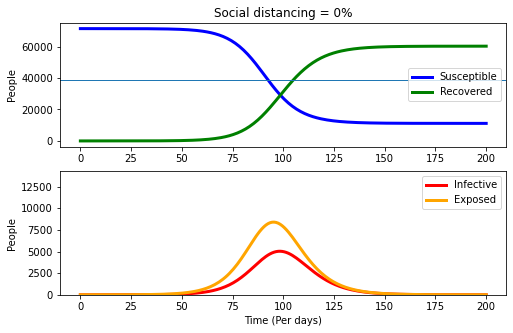

In [7]:
# plot the graph 
plt.figure(figsize=(8,5))

plt.subplot(2,1,1)
plt.title('Social distancing = '+str(u*100)+'%')
plt.plot(t,s*N,color='blue', lw=3, label='Susceptible')
plt.plot(t,r*N,color='green', lw=3, label='Recovered')
plt.axhline(hm*N,lw=1)
plt.ylabel('People')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,i*N,color='red', lw=3, label='Infective')
plt.plot(t,e*N,color='orange', lw=3, label='Exposed')
plt.ylim(0,N/5)
plt.xlabel('Time (Per days)')
plt.ylabel('People')
plt.legend()

plt.show()

In [8]:
dt = x * N

In [15]:
df = pd.DataFrame(data=dt, columns=['Susceptible','Exposed','Infective','Recovered'],index = [str(i+1) for i in range(G)]).astype(int)
df

,Susceptible,Exposed,Infective,Recovered
1,71370,1,0,0
2,71369,0,0,0
3,71369,0,0,0
4,71369,0,0,0
5,71369,0,0,0
...,...,...,...,...
196,11153,1,1,60213
197,11153,1,1,60214
198,11153,1,1,60214
199,11153,1,1,60215


In [10]:
# maximun infective in 1 day
print('Maximum Infectives in day : ',int(df["Infective"].idxmax()),'\n Infective : ',df["Infective"].max(),'\n Recovered : ',df.loc[df["Infective"].idxmax(), 'Recovered'])

Maximum Infectives in day :  99 
 Infective :  5032 
 Recovered :  29000


In [11]:
print(df["Infective"].max() + df.loc[df["Infective"].idxmax(), 'Recovered'])

34032


In [12]:
print((1-(1/R0))*N)

38929.63636363636


## การบันทึกไฟล์เป็น CSV เพื่อนำไป Visualization


In [13]:
# df.to_csv(r'#local file where you want to save#\#name#.csv', index = False) then delete the '#' in front of code
# df.to_csv(r'C:\Users\User\Documents\Covid data visual\ManchaKhiriModel.csv', index = False)